In [21]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn import metrics
from matplotlib import pyplot as plt

In [22]:
# load data and make train test split
breast_c = datasets.load_breast_cancer()
digits = datasets.load_digits()
diabetes = datasets.load_diabetes()

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(breast_c.data, breast_c.target, test_size=.3)
X_train_dig, X_test_dig, y_train_dig, y_test_dig = train_test_split(digits.data, digits.target, test_size=.3)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(diabetes.data, diabetes.target, test_size=.3)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


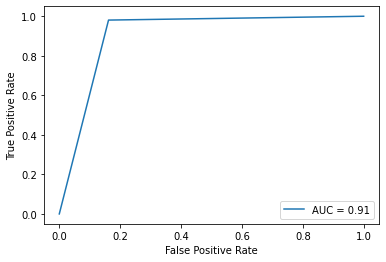

ValueError: operands could not be broadcast together with shapes (540,64) (30,) 

In [23]:
# Breast Cancer
logic_bc = LogisticRegression(max_iter=500).fit(X_train_bc, y_train_bc)
forest_bc = QuadraticDiscriminantAnalysis().fit(X_train_bc, y_train_bc)
gauss_bc = GaussianNB().fit(X_train_bc, y_train_bc)
classifiers = [logic_bc, forest_bc, gauss_bc]

ys = [y_test_bc, y_test_dig, y_test_dia]
Xs = [X_test_bc, X_test_dig, X_test_dia]
for i, clf in enumerate(classifiers):
    y = ys[i]
    pred = clf.predict(Xs[i])
    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    
    plt.show()